In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = '/home/alejandro/Dropbox/osb_enftransm-covid-19_27092021.csv'

In [3]:
def GetExperiments( N = 100000 ):
    
    freq = np.zeros( N )
    
    for i in range(int(N)):
        
        d1 = np.random.randint(1,7)
        d2 = np.random.randint(1,7)
        
        freq[i] = d1+d2
        
    return freq

In [10]:
freq = GetExperiments(10000)

# Crear un histograma

(array([ 257.,  563.,  875., 1089., 1382., 1687., 1370., 1131.,  812.,
         834.]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 <a list of 10 Patch objects>)

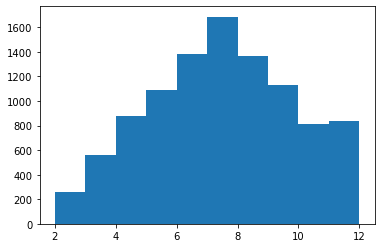

In [19]:
plt.hist(freq)

In [16]:
x = np.linspace(2,13,12)
h, bins = np.histogram(freq, bins=x)
w = np.diff(bins)
w

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

<BarContainer object of 11 artists>

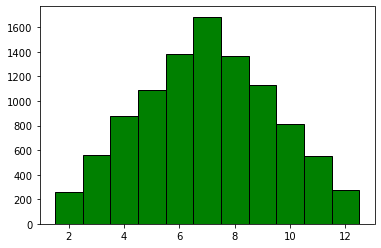

In [21]:
plt.bar( bins[:-1], h, color='g', ec='k', width=w )

In [22]:
# Area del histograma
I = np.sum(w*h); print(I)

10000.0


In [23]:
hnorm = h/I
print(np.sum(w*hnorm))

0.9999999999999999


<BarContainer object of 11 artists>

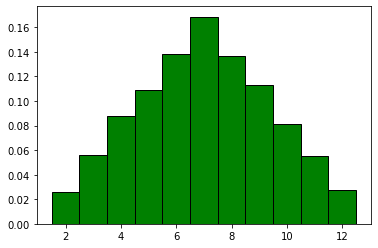

In [24]:
plt.bar( bins[:-1], hnorm, color='g', ec='k', width=w )

In [26]:
hnorm

array([0.0257, 0.0563, 0.0875, 0.1089, 0.1382, 0.1687, 0.137 , 0.1131,
       0.0812, 0.0556, 0.0278])

In [27]:
1/6

0.16666666666666666